We are trying to look this Customer Analytics problem with following lenses:

- Sales Funnel Analytics
- Customer Segmentation
- Predictive Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

We can see how customer responded to the campaigns / marketing efforts through `Response` column. Also, we can see how a customer reacted to renewal of offer through `Renew Offer Type`. We can also see what sales channel through `Sales Channel`.

Now, we dwell on engagement of customers. Trying to find out:

- Overall engagement rate
- Engagement rates by offer type
- Engagement rates by offer type and vehicle class
- Engagement rates by sales channel
- Engagement rates by sales channel and vehicle size

In [5]:
# Overall Engagement
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [6]:
(df.groupby('Response').count()['Customer']/df.shape[0] * 100).map("{:.2f}%".format)

Response
No     85.68%
Yes    14.32%
Name: Customer, dtype: object

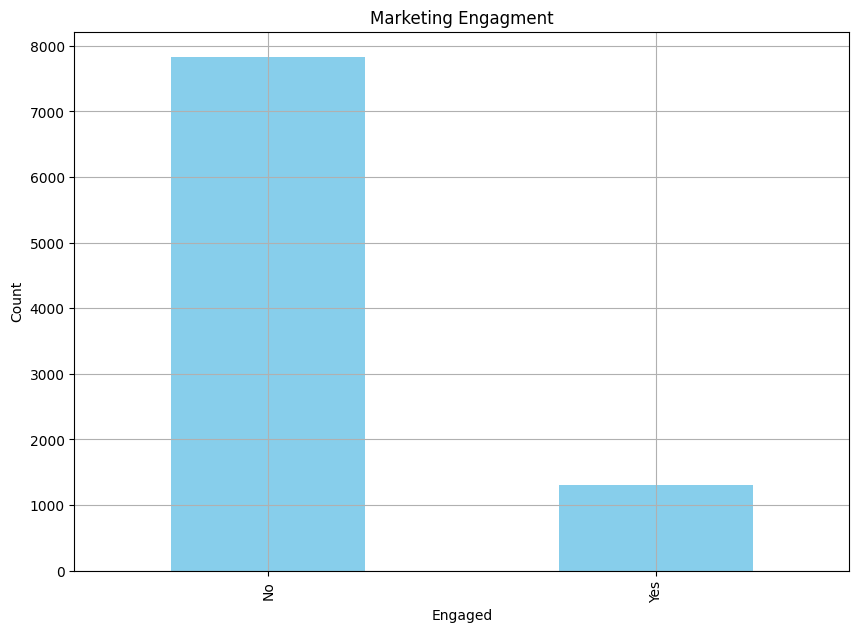

In [7]:
ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [8]:
# Engagement rates by offer type
df.groupby(['Response', 'Renew Offer Type']).count()['Customer']


Response  Renew Offer Type
No        Offer1              3158
          Offer2              2242
          Offer3              1402
          Offer4              1024
Yes       Offer1               594
          Offer2               684
          Offer3                30
Name: Customer, dtype: int64

In [9]:
# We are only interested on the customers who say yes to renew offer types
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

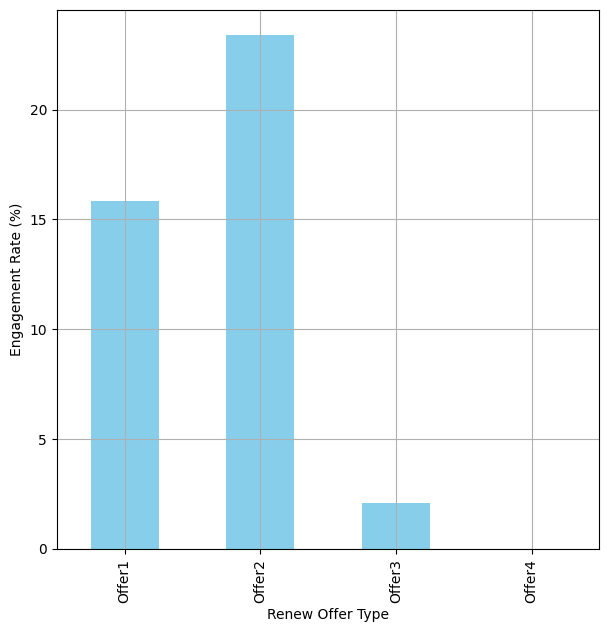

In [10]:
# Visualizing via bar plot
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

We can see offer 2 has the highest response. While analysing customers, we often want to know the demographics and attributes of customers for each event, so that we can understand what works best for which type of customers. This can lead to further improvements in the next marketing campaign by better targeting those subgroups of customers.

In [11]:
# Engagement rates by offer type and vehicle class
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

In [12]:
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [13]:
by_offer_type_df.head()

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
Name: Customer, dtype: float64

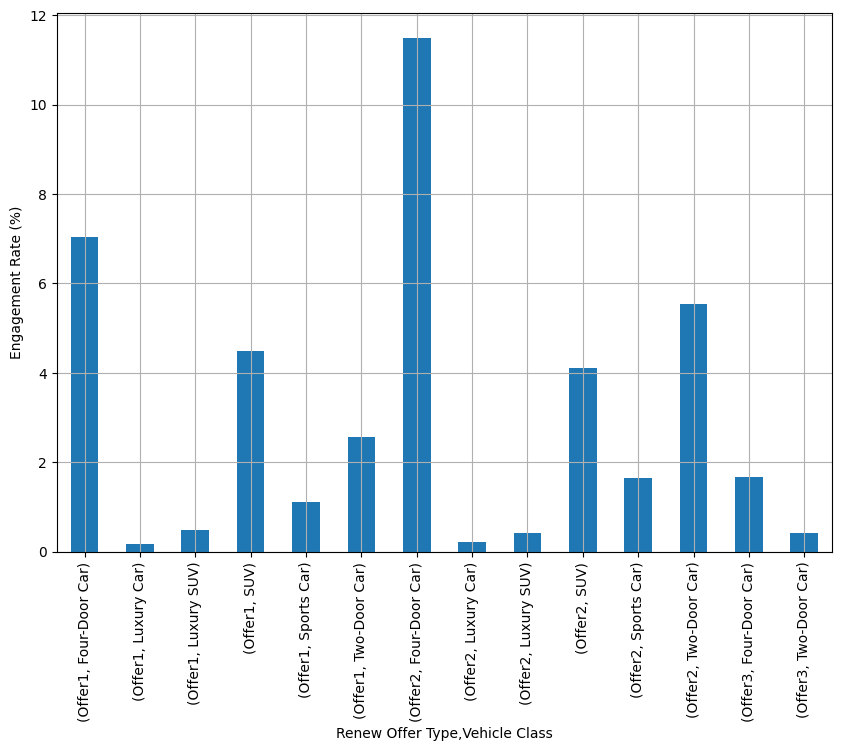

In [14]:
ax = (by_offer_type_df*100.0).plot( # To get the percentage of each, we multiply all column values by 100
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In all of the offers, we can see customers respond high for 4-door cars, and, for 2 doors car, it is almost same. But, for SUV, it is different for Offer 1 than Offer 2.

In [15]:
# Engagement rates by sales channel
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

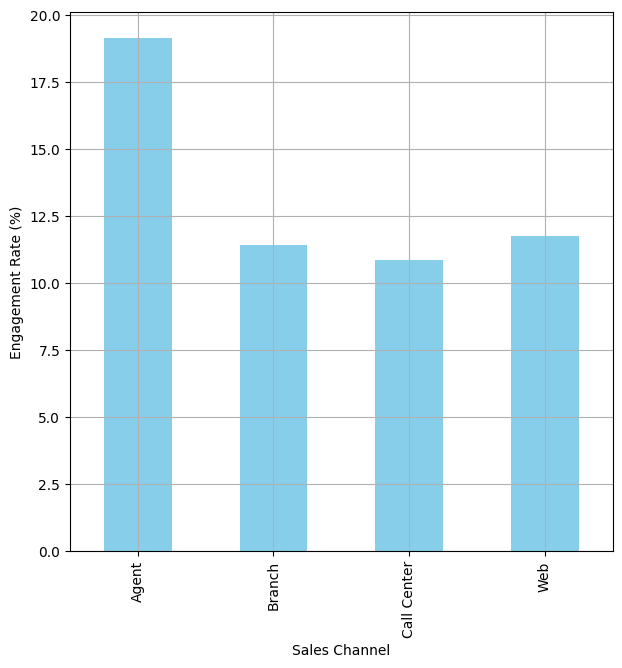

In [16]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

It seems that Agent works the best in terms of getting responses from the customers. All others seem to be almost same. So, we have to dig down deeper to the results.

In [17]:
# Engagement rates by sales channel and vehicle size
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

In [18]:
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [19]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


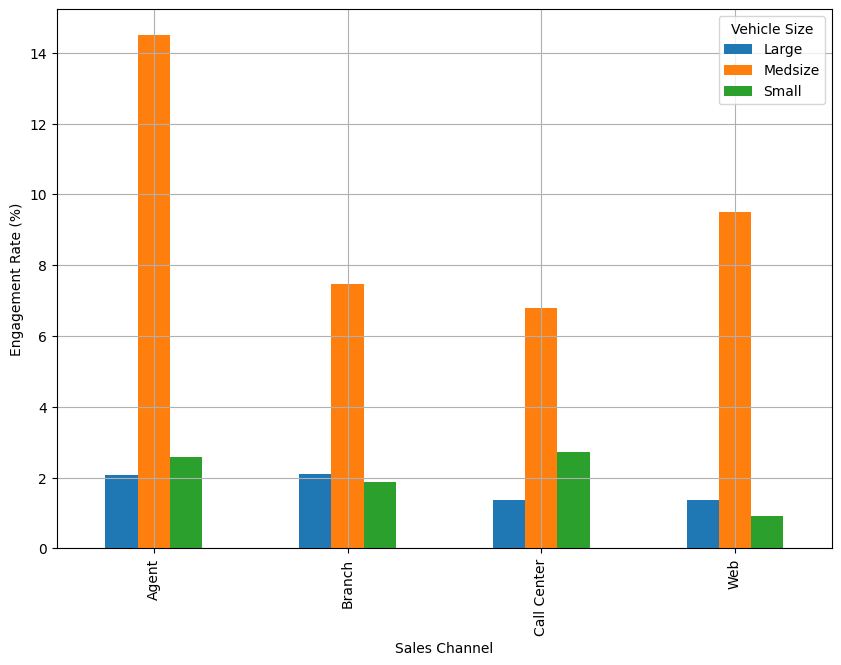

In [20]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

Customers with Medsize vehicles respond the best to all sales channels. The engagement rates across different sales channels differ slightly between Large and Small vehicle owners. For example, Small vehicle owners respond better through Agent and Call Center channels, while on the other hand, Large vehicle owners respond better through the Branch and Web channels. Now, we can utilize this insight in the next marketing efforts. For example, as Small car owners respond with a higher chance through Agent and Call Center, we can utilize those two channels more heavily for Small car owners.

#### Segmenting Customer Lifetime Value and Months Since Policy Inception

In [21]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [22]:
# Getting customers with higher lifetime value
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [23]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low


In [24]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [27]:
# Defining Policy Age Segments based on `Months Since Policy Inception`
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

In [26]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


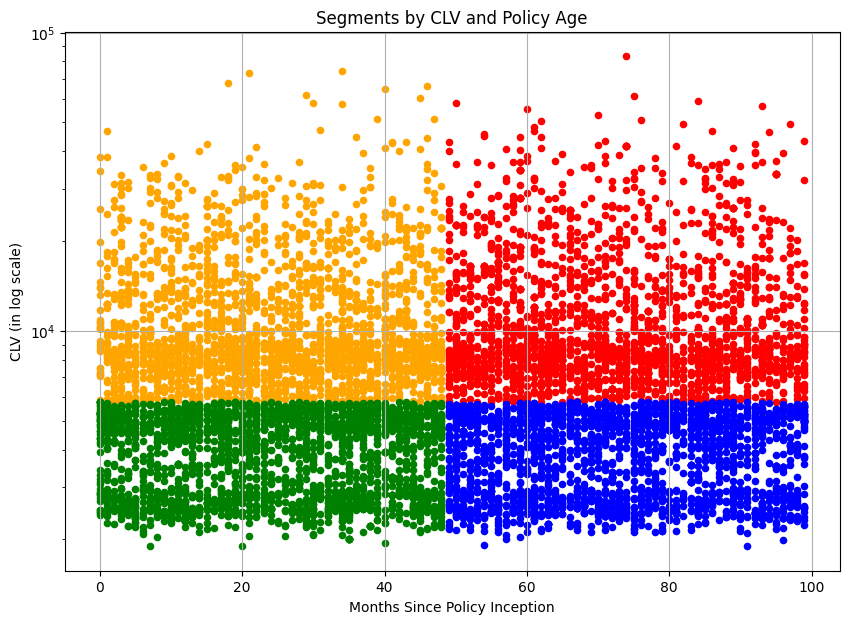

In [28]:
# Visualizing the result
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True, # Log scale is often used for monetary values, as they often have high skewness in their values
    color='red' # High CLV and High Policy Age segment
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue' # Low CLV and High Policy Age group
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange' # High CLV and Low Policy Age group
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green', #  Low CLV and Low Policy Age group
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

 Let's see whether there is any noticeable difference in the engagement rates among these four segments

In [32]:
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']


In [35]:
engagment_rates_by_segment_df


,CLV Segment,Policy Age Segment,Customer
0,Low,High,0.162450
1,Low,Low,0.139957
2,High,High,0.138728
3,High,Low,0.132067


It is noticeable that the High Policy Age and Low CLV segment has the highest engagement rate among the four segments. Lets also look the same thing in bar plot.

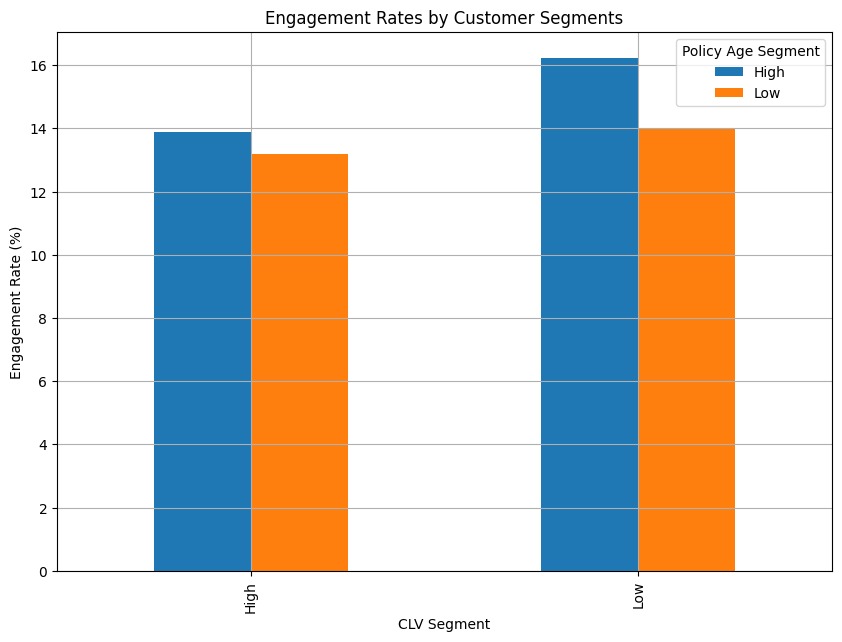

In [30]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

High Policy Age Segment has higher engagement than the Low Policy Age Segment. This suggests that those customers who have been insured by this company longer respond better.

**Reference**: Hands-On Data Science for Marketing
By Yoon Hyup Hwang